<a href="https://colab.research.google.com/github/jjuandiego099/cuadernos-y-proyectos-IA/blob/main/Copia_de_Fundamento_Cuaderno_11_%C3%81rboles_de_Decisi%C3%B3n_para_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 11. Árboles de Decisión para Clasificación y regresión

---


## <font color="red">11.1 Introducción
Los árboles de decisión para clasificación y regresión son una técnica poderosa en el campo del aprendizaje supervisado. Se utilizan para predecir una variable categórica (o clase) a partir de un conjunto de variables predictoras. En lugar de seguir una fórmula matemática única, estos modelos dividen el espacio de los predictores en subregiones que son más homogéneas respecto a la clase objetivo. Esto se hace mediante una serie de decisiones binarias, basadas en los valores de los atributos, que conducen a un nodo terminal (hoja), donde se hace la predicción.

El proceso de construcción de un árbol de decisión incluye la selección de puntos de corte o raiz en las variables para dividir el espacio muestral en subconjuntos. Existen varias estrategias para la creación de estos árboles, siendo las más comunes el Criterio de Impureza de Gini, la Entropía y el Cálculo de la Varianza. Los árboles de decisión pueden mejorar su desempeño mediante métodos como Random Forest y Gradient Boosting, que veremos en los siguiente cuadernos, estoa combinan múltiples árboles para reducir el sobreajuste (overfitting) y mejorar la generalización del modelo, llamados modelos ensamblados.


## <font color="red">11.2 ¿Cómo funciona un árbol de decisión para clasificación?
Un árbol de decisión clasifica una observación siguiendo una serie de divisiones binarias basadas en las características de la muestra. El árbol comienza en un nodo raíz, donde se evalúan las características de los datos. A partir de ahí, las observaciones se dividen en diferentes ramas según las condiciones específicas establecidas para cada característica. Este proceso continúa hasta llegar a un nodo terminal, que es el que asigna una clase a la observación.

![imagen](https://github.com/adiacla/bigdata/blob/master/arbol.png?raw=true)

Como se muestra en la imagen un nodo raiz se crea con un criterio de regla de decisión para aquel cuya horas de estudio son menores o iguales a 0.5 y mayores.
Así sucesivamente el arbol irá creando ramas de manera recursiva hasta llegar a las hojas donde asigna la etiquete a los registros que cumplen la condición.

* División inicial: En el nodo raíz, el árbol evalúa la primera condición, por ejemplo, si el valor de una variable es mayor o menor que un umbral específico.

 Dependiendo del resultado, la observación se dirige por una rama a otro nodo.

* División recursiva: El proceso de división continúa recursivamente en cada nuevo nodo. En cada nodo, se evalúa una nueva condición para una característica diferente.

* Nodo terminal: Cuando ya no es posible dividir más las observaciones (o cuando se alcanza un umbral de profundidad del árbol), el nodo terminal asigna la clase más frecuente entre las observaciones que llegaron a ese nodo.

### <font color="blue">11.2.1 Métodos para seleccionar las divisiones

Para decidir en qué punto dividir las observaciones, se utilizan criterios de división. Los más comunes son:

* **Gini Impurity:** Mide la impureza de un nodo. Cuanto menor sea la impureza, más homogénea será la clase en ese nodo. El objetivo es dividir el nodo de manera que las subregiones sean lo más puras posibles, es decir, que todas las observaciones dentro de un nodo terminal pertenezcan a la misma clase.

  Formula del Gini Impurity para una clase $K$ es:

  $Gini(t) = 1 - ∑_{k=1}^{K} p_k^2$

  donde $p_k$ es la proporción de observaciones de la clase $k$ en el nodo $t$.

* **Entropía (Cruzada de Shannon)**: La entropía mide la cantidad de desorden o incertidumbre en una división. La idea es reducir la entropía de un conjunto de datos mediante la división en nodos más homogéneos.
La fórmula de la entropía es:
  $Entropía(t) = - ∑_{k=1}^{K} p_k \log_2(p_k)$

  donde $p_k$ es la probabilidad de observar la clase $k$ en el nodo $t$.

* **Índice de Gini vs Entropía**: Ambos criterios se utilizan para elegir el mejor punto de corte, aunque el índice de Gini es más popular debido a su simplicidad y rapidez computacional. Sin embargo, la entropía tiende a ser más informativa en divisiones con muchas clases.

### <font color="blue">11.2.2 Ventajas de los árboles de decisión para clasificación
* Interpretabilidad: Los árboles de decisión son modelos muy fáciles de interpretar y visualizar. Cada nodo y rama representan una regla de decisión que puede explicarse fácilmente.
* No requieren normalización de los datos: A diferencia de otros modelos como las máquinas de soporte vectorial (SVM) o las regresiones lineales, los árboles de decisión no requieren que los datos sean normalizados o estandarizados.
* Manejo de datos categóricos y numéricos: Los árboles pueden manejar tanto variables numéricas como categóricas sin necesidad de transformarlas (por ejemplo, a variables dummy).
* Resistencia a los valores atípicos: Los árboles no se ven muy afectados por outliers, ya que los puntos extremos no suelen influir en el valor de la división.
* Automática selección de variables importantes: Los árboles de decisión pueden identificar qué variables son más relevantes para la clasificación.

### <font color="blue">11.2.3 Desventajas de los árboles de decisión para clasificación
* Overfitting: Los árboles de decisión tienden a sobreajustarse a los datos de entrenamiento, especialmente cuando se permiten árboles muy profundos. Esto se debe a que pueden aprender detalles muy específicos que no generalizan bien a nuevos datos.
* Inestabilidad: Un pequeño cambio en los datos de entrenamiento puede llevar a una estructura de árbol completamente diferente.
* Modelo sesgado en clases desbalanceadas: Si los datos están desbalanceados, el árbol puede predecir predominantemente la clase mayoritaria.


#### <font color="blue">11.2.4 Estrategias para evitar el overfitting
Existen varias técnicas que se pueden aplicar para reducir el sobreajuste en árboles de decisión:
* Poda (Pruning): La poda elimina ramas del árbol que tienen poca importancia o que sobreajustan los datos. Se pueden usar métodos como el Cost Complexity Pruning para realizar una poda que elimine ramas que no mejoren significativamente la precisión del modelo.
* Limitación de la profundidad del árbol: Limitar la profundidad máxima del árbol es una forma sencilla de evitar que el árbol crezca demasiado, lo que podría llevar a un sobreajuste.
* Mínimo número de muestras por hoja: Establecer un número mínimo de observaciones para permitir una división en cada nodo o para que un nodo sea terminal puede ayudar a evitar divisiones demasiado específicas.
* Métodos de ensamblaje: Técnicas como Random Forest y Gradient Boosting combinan múltiples árboles de decisión para mejorar la robustez y reducir el riesgo de sobreajuste.


---


## <font color="red">11.3 Ejercicio de Construcción, Evaluación y Visualización de un Árbol de Decisión para Clasificación

En este ejercicio vamos a usar las librerias de sklearn sklearn.tree (https://scikit-learn.org/stable/api/sklearn.tree.html)

#### Paso 1:  Preparación del conjunto de datos y codificación
Primero, creamos el conjunto de datos con variables categóricas y las codificamos para que puedan ser utilizadas en el modelo.





In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Crear el conjunto de datos
data = {
    "Horas de Estudio": ["Alta", "Baja", "Baja", "Alta", "Alta","Baja", "Alta", ],
    "Asistencia": ["Buena", "Buena", "Mala", "Mala", "Buena","Buena", "Mala",],
    "Resultado": ["Sí", "No", "No", "Sí", "Sí","No", "No",]
}

df = pd.DataFrame(data)
df

,Horas de Estudio,Asistencia,Resultado
0,Alta,Buena,Sí
1,Baja,Buena,No
2,Baja,Mala,No
3,Alta,Mala,Sí
4,Alta,Buena,Sí
5,Baja,Buena,No
6,Alta,Mala,No


In [ ]:
# Codificar variables categóricas a numéricas
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]


#Dado que son muy pocos datos no vamos a dividir en entrenamiento y pruebas, usaremos la data tanto para entrenar como para probar.


In [ ]:
X,y

(   Horas de Estudio  Asistencia
 0                 0           0
 1                 1           0
 2                 1           1
 3                 0           1
 4                 0           0
 5                 1           0
 6                 0           1,
 0    1
 1    0
 2    0
 3    1
 4    1
 5    0
 6    0
 Name: Resultado, dtype: int64)

### Paso 2: Entrenamiento del Árbol de Decisión
Ahora, entrenamos un Árbol de Decisión utilizando el conjunto de entrenamiento y hacemos las predicciones en el conjunto de prueba.


In [ ]:
# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X, y)

# Hacer predicciones
y_pred = tree_clf.predict(X)

# Evaluación del modelo
accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)


In [ ]:
# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)

Precisión del modelo: 0.8571428571428571
Matriz de confusión:
 [[4 0]
 [1 2]]


In [ ]:
# Verificar si hay más de una clase en y_test para calcular el ROC AUC
if len(np.unique(y)) > 1:
    roc_auc = roc_auc_score(y, tree_clf.predict_proba(X)[:, 1])
else:
    roc_auc = "No se puede calcular ROC AUC (solo una clase en y_test)"


print("Área bajo la curva ROC:", roc_auc)

Área bajo la curva ROC: 0.9583333333333333


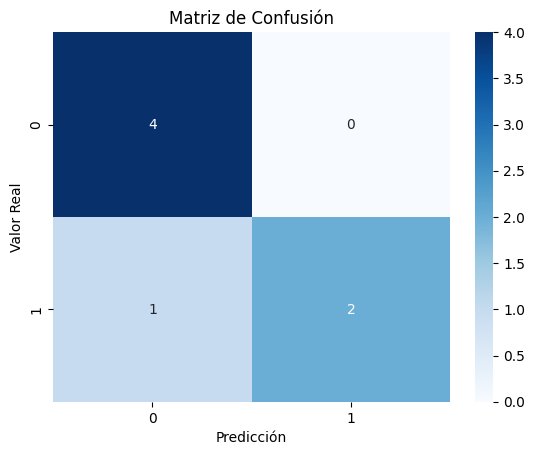

In [ ]:
#Grafique la matriz confusión en mapa de calor con seaborn
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

### Paso 3: Visualización del Árbol de Decisión
A continuación, visualizamos el árbol de decisión entrenado para entender cómo se están realizando las predicciones.


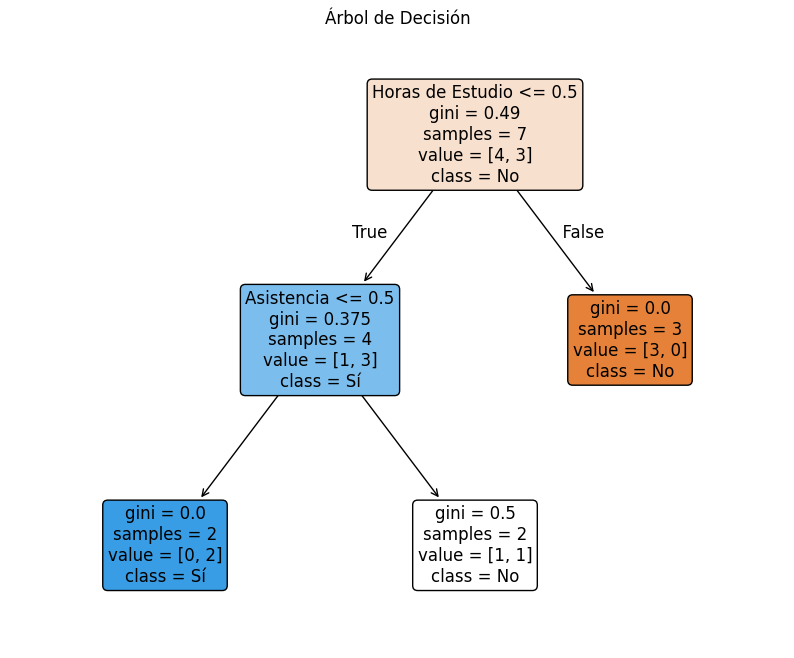

In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(10, 8))
plot_tree(tree_clf, filled=True, feature_names=["Horas de Estudio", "Asistencia"], class_names=["No", "Sí"], rounded=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()


### Paso 4: Curva ROC
Finalmente, calculamos y graficamos la curva ROC para evaluar el rendimiento del modelo a través de diferentes umbrales de clasificación.

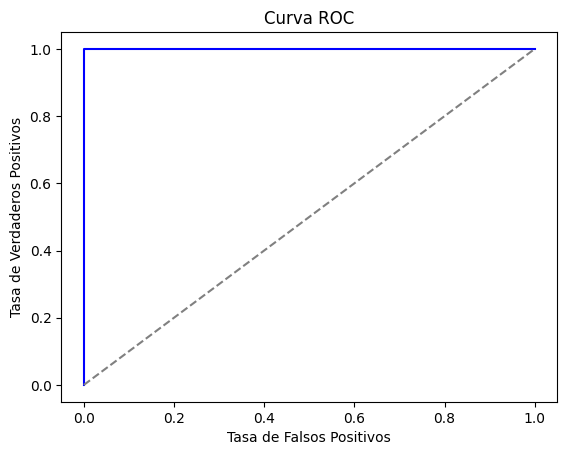

In [ ]:
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()


### Resumen de los resultados
Precisión del modelo: Calculada con la función accuracy_score.

Matriz de confusión: Evaluación detallada de las predicciones (verdaderos positivos, falsos positivos, etc.).

Área bajo la curva ROC: Medida de rendimiento del modelo en función de su capacidad para distinguir entre las clases.

Curva ROC: Visualización gráfica del rendimiento del modelo con diferentes umbrales de decisión.

---

## <font color="red">11.5 Segundo ejercicio on Arboles de Decisión el tema de problemas cardiacos

### Paso 1: Cargar y preprocesar los datos
Primero, cargamos el conjunto de datos, verificamos los valores faltantes y luego realizamos la imputación de los valores faltantes con la mediana. También convertimos la variable categórica Sexo a valores numéricos (0 para masculino y 1 para femenino).

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np


# Cargar el dataset
url = "https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/pacientes.csv"
df_patients = pd.read_csv(url)

# Verificar las columnas disponibles
print("Columnas disponibles en el dataset:", df_patients.columns.tolist())

# Imputar valores faltantes con la mediana
df_patients = df_patients.fillna(df_patients.median(numeric_only=True))
label_col_name='problema_cardiaco'



In [ ]:
# Separar las características y la etiqueta
X = df_patients.drop(columns=[label_col_name])
y = df_patients[label_col_name]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("División de datos completada:")
print(f"Entrenamiento: {X_train.shape[0]} registros")
print(f"Prueba: {X_test.shape[0]} registros")

### Paso 2: Entrenamiento del Árbol de Decisión
Entrenamos un Árbol de Decisión con el conjunto de entrenamiento. Para la clasificación, utilizamos el DecisionTreeClassifier de Scikit-learn.

In [ ]:
# Crear el modelo de Árbol de Decisión
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = tree_clf.predict(X_test)

### Paso 3: Evaluación del modelo
Evaluamos el rendimiento del modelo utilizando varias métricas: precisión, matriz de confusión y área bajo la curva ROC (AUC). También graficamos la curva ROC.


In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1])

# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
print("Área bajo la curva ROC:", roc_auc)

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, tree_clf.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, color='blue')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Curva ROC')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.show()

### Paso 4: Visualización del Árbol de Decisión
Utilizamos la función plot_tree para visualizar el árbol de decisión y entender cómo se toman las decisiones en función de las características.


In [ ]:
# Graficar el árbol de decisión
plt.figure(figsize=(30, 30))
plot_tree(tree_clf, filled=True, feature_names=X.columns, class_names=['No','Si'], rounded=True, fontsize=12)
plt.title("Árbol de Decisión")
plt.show()


### Resumen del flujo:
Carga y preprocesamiento: Se cargan los datos y se manejan los valores faltantes (con la mediana), y se convierten las variables categóricas a numéricas.

Entrenamiento: El modelo de Árbol de Decisión es entrenado utilizando el conjunto de entrenamiento.

Evaluación: Se calcula la precisión, la matriz de confusión y el área bajo la curva ROC para evaluar el rendimiento del modelo.

Visualización: Se visualiza el árbol de decisión para interpretar cómo se toman las decisiones.


Tal como se visualiza el modelo pareciera que puede estar sobre entrenado, es quede predice en un arbol que llega a su maxima profundidad, por lo tanto
Para evitar el sobreajuste en un modelo de Árbol de Decisión, puedes usar varios enfoques como limitar la profundidad del árbol, ajustar el número mínimo de muestras necesarias para dividir un nodo, o establecer un criterio de complejidad. Aquí te dejo algunas variantes del código que puedes implementar para controlar el sobreajuste:

***Limitar la profundidad máxima del árbol***
Reducir la profundidad del árbol asegura que no crezca demasiado y evita que modele ruido en los datos.

In [ ]:
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)


*** Aumentar el número mínimo de muestras*** para dividir un nodo

In [ ]:
tree_clf = DecisionTreeClassifier(min_samples_split=10, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)


***Establecer un umbral mínimo para la ganancia de información***

min_impurity_decrease requiere que una división reduzca la impureza por una cantidad mínima.

In [ ]:
tree_clf = DecisionTreeClassifier(min_impurity_decrease=0.01, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)


***Podar el árbol mediante la complejidad de costo***

ccp_alpha (Cost Complexity Pruning) permite podar ramas menos importantes que no reducen mucho el error.

In [ ]:
tree_clf = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

*** Validación cruzada para optimizar hiperparámetros***
Puedes usar GridSearchCV para buscar los mejores parámetros que eviten el sobreajuste.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'ccp_alpha': [0.0, 0.01, 0.1],
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_tree = grid_search.best_estimator_
y_pred = best_tree.predict(X_test)

print("Mejores parámetros:", grid_search.best_params_)


***Cambiar el criterio de división***
Por defecto, el Árbol de Decisión usa el criterio gini. También puedes probar con entropy para medir la pureza de los nodos.

In [ ]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)


***Evaluación del Modelo***
Después de implementar estas variantes, evalúa el modelo con métricas como precisión, matriz de confusión y ROC-AUC:

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precisión:", accuracy)
print("Matriz de Confusión:\n", conf_matrix)

# Calcular el AUC-ROC si hay al menos dos clases
if len(np.unique(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, tree_clf.predict_proba(X_test)[:, 1])
    print("Área bajo la curva ROC:", roc_auc)
